In [3]:
import sys
sys.path.append('..')
import numpy as np
import sklearn
import mlp

%matplotlib inline 
import matplotlib.pyplot as plt

# Experiments

## IRIS data

In [6]:
def split(X, y, train_ratio):
    train_x, train_y = X[:int(X.shape[0]*train_ratio)], y[:int(y.shape[0]*train_ratio)]
    valid_x, valid_y = X[int(X.shape[0]*train_ratio):], y[int(y.shape[0]*train_ratio):]
    return train_x, train_y, valid_x, valid_y

import sklearn
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from experiment import normalized

iris = datasets.load_iris()
X = normalized(iris.data)
y = OneHotEncoder().fit_transform(iris.target.reshape(iris.target.shape[0], 1)).toarray()

X, y = sklearn.utils.shuffle(X, y)
# split to training and validation set
train_x, train_y, valid_x, valid_y = split(X, y, 0.7)

## Numbers of hidden layer
```python
    for n_hidden_layers in range(1, 11, 2):
        mlp_clf = mlp.MLPClassifier(
                                    hidden_layer_sizes=128,
                                    n_hidden_layers=n_hidden_layers,
                                    activation='relu',
                                    solver='sgd',
                                    momentum=0.,
                                    nesterov=False,
                                    loss='cross_entropy',
                                    weight_initializer='orthogonal',
                                    bias_initializer='zeros',
                                    batch_size=32,
                                    learning_rate=0.01,
                                    lr_decay_on_plateau=0.5,
                                    lr_decay_patience=15,
                                    early_stop_patience=40
                )
```

In [7]:
import pickle

histories = pickle.load(open('./n_hidden_layer_history.pl', 'rb'))

### Loss

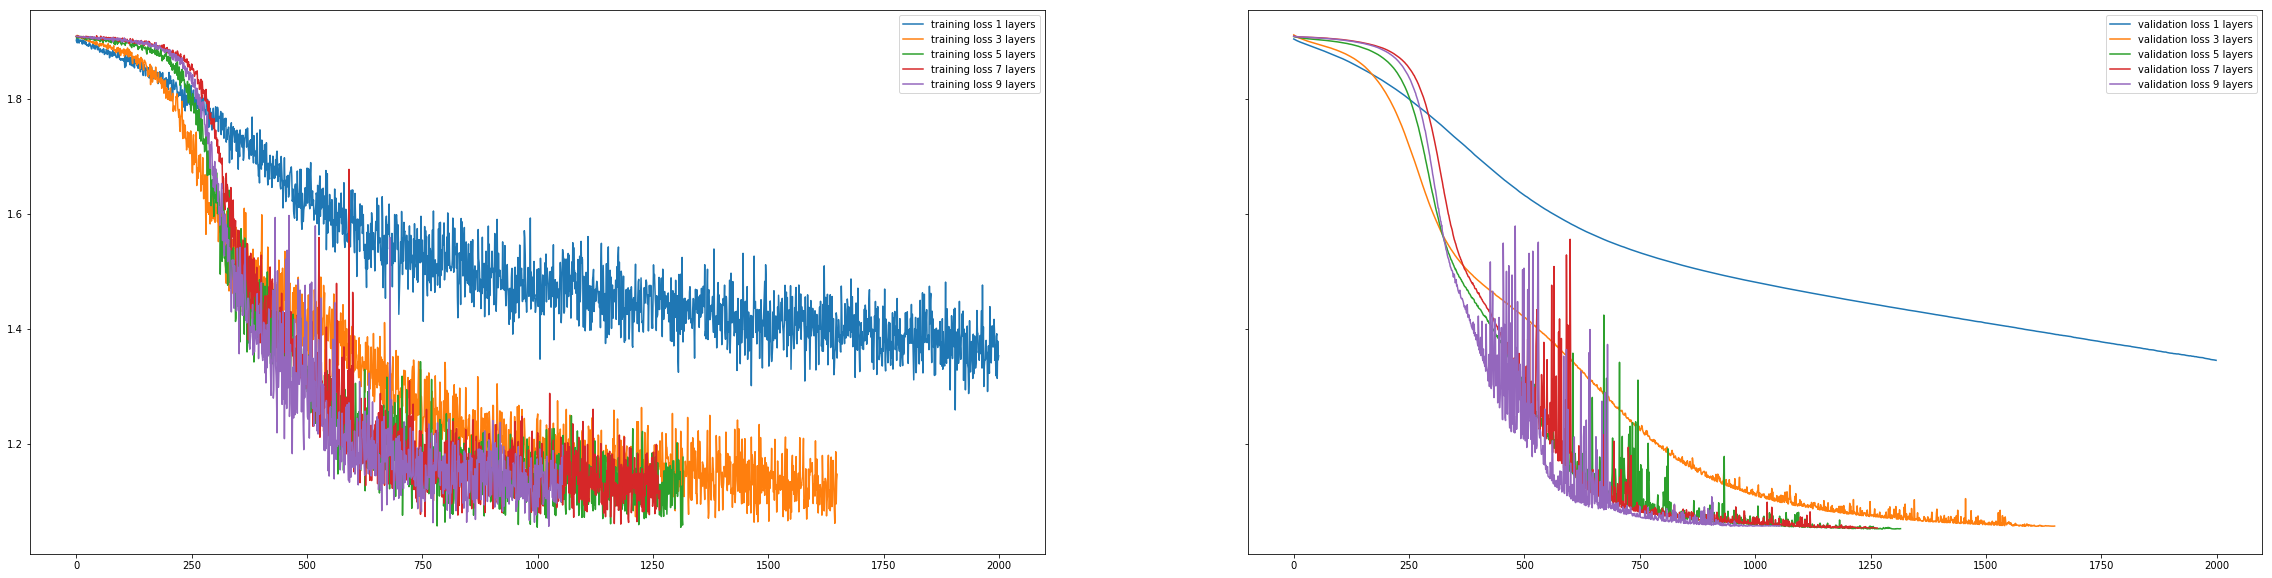

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(40, 10))
for i in range(len(histories)):
    n_layer = range(1, 11, 2)[i]
    ax1.plot(histories[i]['loss'], label='training loss ' + str(n_layer) + ' layers')
    ax2.plot(histories[i]['valid_loss'], label='validation loss ' + str(n_layer) + ' layers')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

### Accuracy

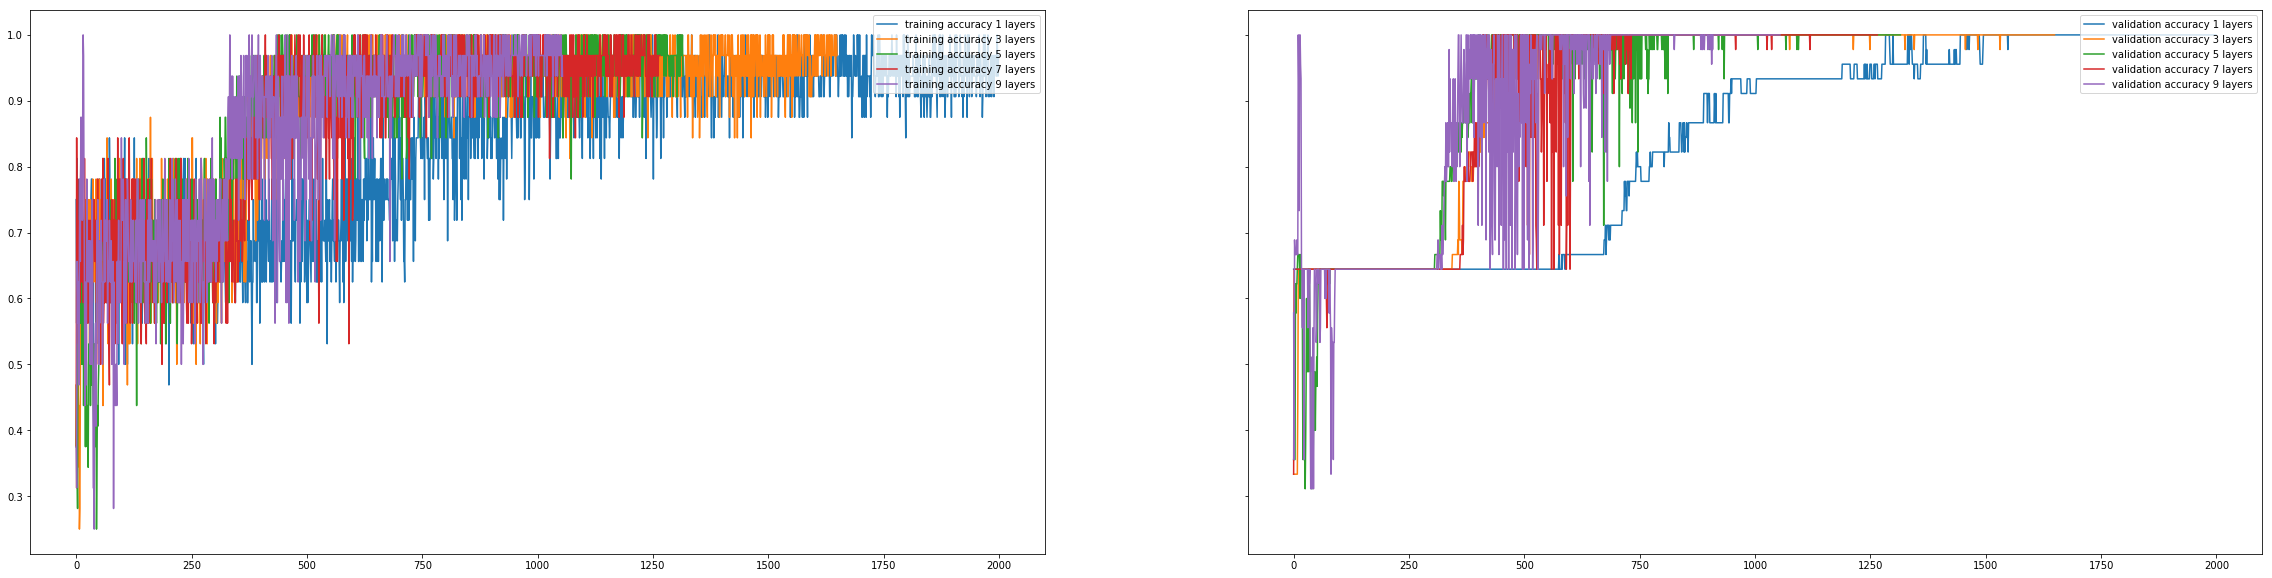

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(40, 10))
for i in range(len(histories)):
    n_layer = range(1, 11, 2)[i]
    ax1.plot(histories[i]['acc'], label='training accuracy ' + str(n_layer) + ' layers')
    ax2.plot(histories[i]['valid_acc'], label='validation accuracy ' + str(n_layer) + ' layers')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

## ReLU vs Leaky-ReLU vs SELU

In [10]:
relu_history = pickle.load(open('./relu_history.pl', 'rb'))
leaky_relu_history = pickle.load(open('./leaky_relu_history.pl', 'rb'))
selu_history = pickle.load(open('./selu_history.pl', 'rb'))

### Loss

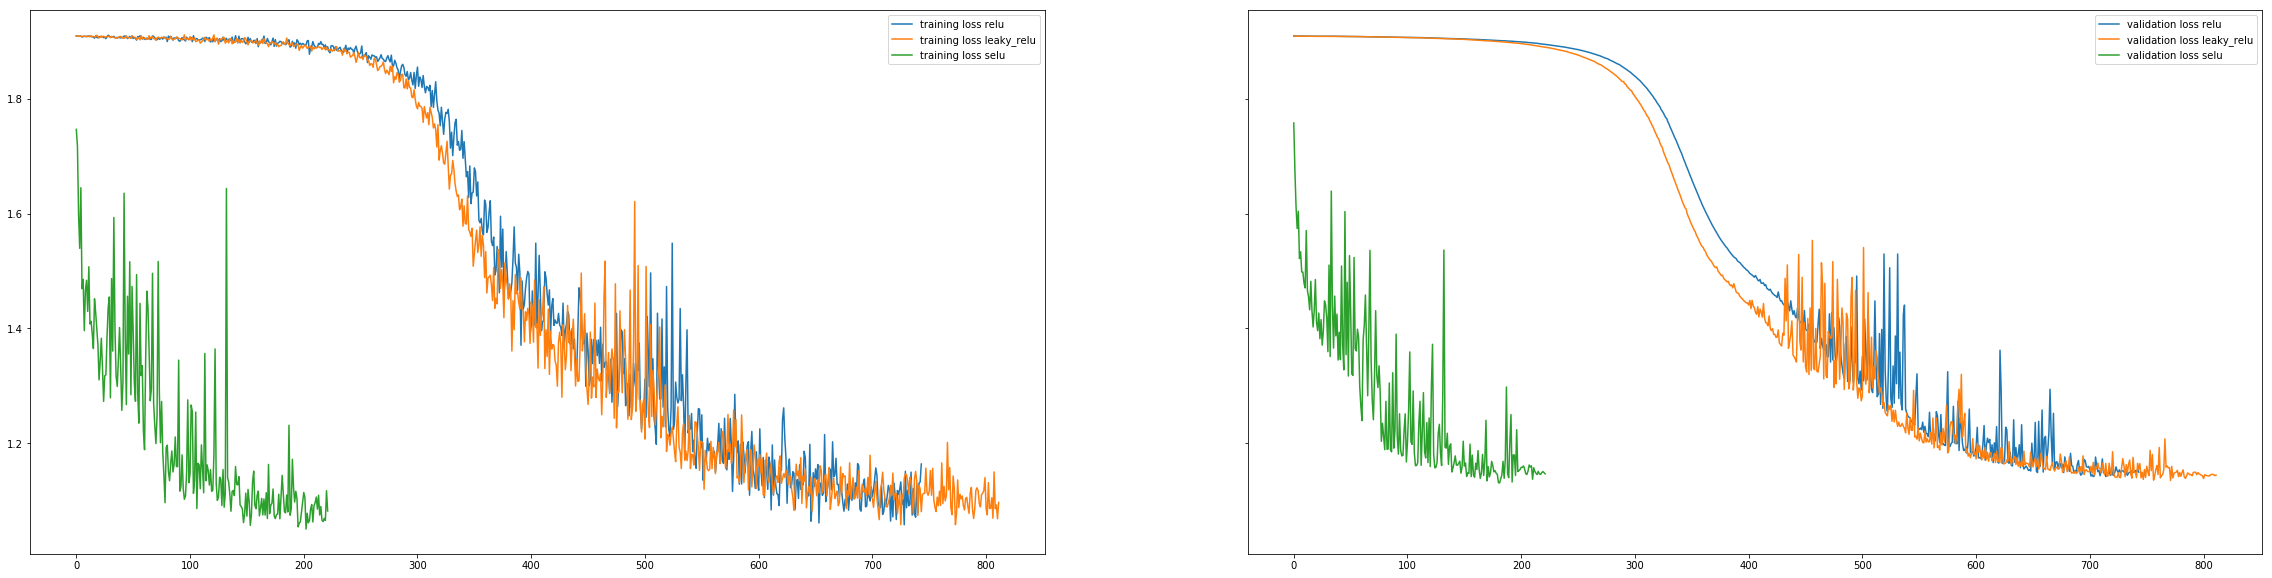

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(40, 10))
ax1.plot(relu_history['loss'], label='training loss relu')
ax1.plot(leaky_relu_history['loss'], label='training loss leaky_relu')
ax1.plot(selu_history['loss'], label='training loss selu')

ax2.plot(relu_history['valid_loss'], label='validation loss relu')
ax2.plot(leaky_relu_history['valid_loss'], label='validation loss leaky_relu')
ax2.plot(selu_history['valid_loss'], label='validation loss selu')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

### Accuracy

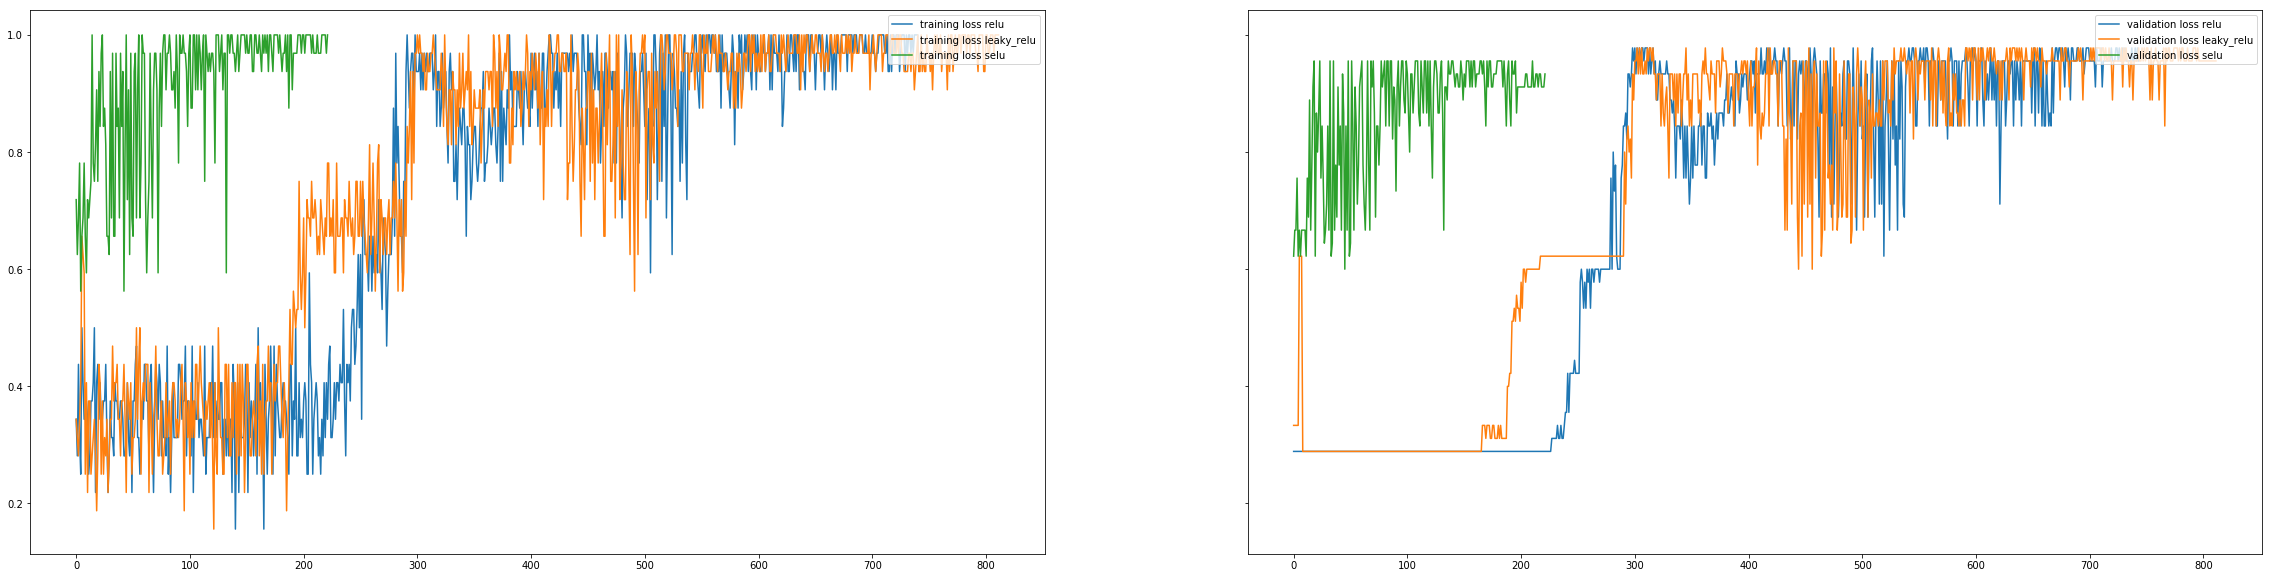

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(40, 10))
ax1.plot(relu_history['acc'], label='training loss relu')
ax1.plot(leaky_relu_history['acc'], label='training loss leaky_relu')
ax1.plot(selu_history['acc'], label='training loss selu')

ax2.plot(relu_history['valid_acc'], label='validation loss relu')
ax2.plot(leaky_relu_history['valid_acc'], label='validation loss leaky_relu')
ax2.plot(selu_history['valid_acc'], label='validation loss selu')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

## Momentum

In [17]:
no_momentum_history = pickle.load(open('./no_momentum_history.pl', 'rb'))
momentum_history = pickle.load(open('./momentum_history.pl', 'rb'))
nesterov_history = pickle.load(open('./nesterov_history.pl', 'rb'))

### Loss

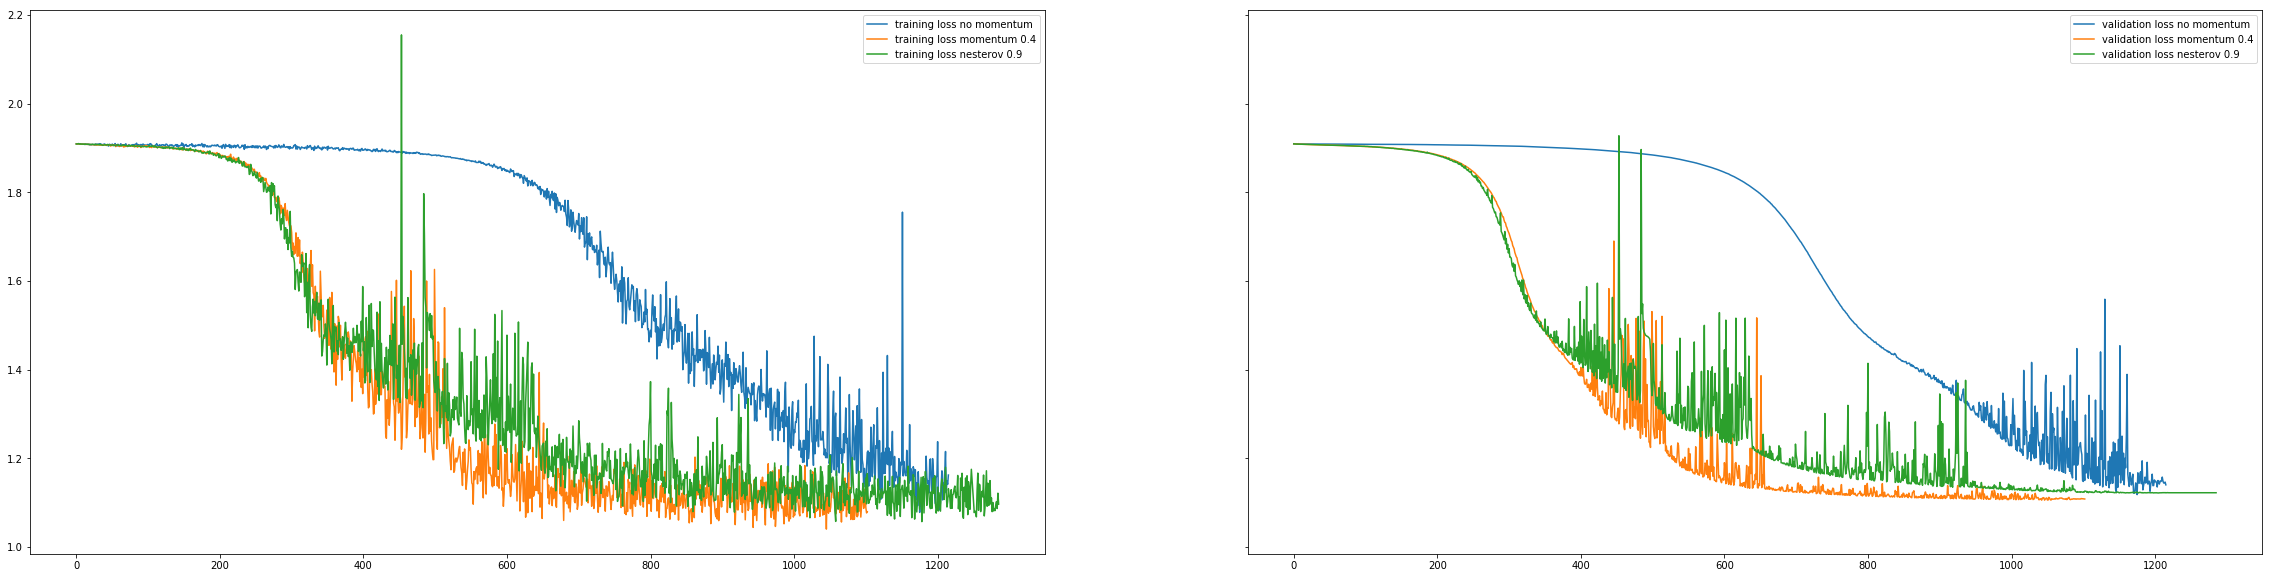

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(40, 10))
ax1.plot(no_momentum_history['loss'], label='training loss no momentum')
ax1.plot(momentum_history['loss'], label='training loss momentum 0.4')
ax1.plot(nesterov_history['loss'], label='training loss nesterov 0.9')

ax2.plot(no_momentum_history['valid_loss'], label='validation loss no momentum')
ax2.plot(momentum_history['valid_loss'], label='validation loss momentum 0.4')
ax2.plot(nesterov_history['valid_loss'], label='validation loss nesterov 0.9')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

### Accuracy

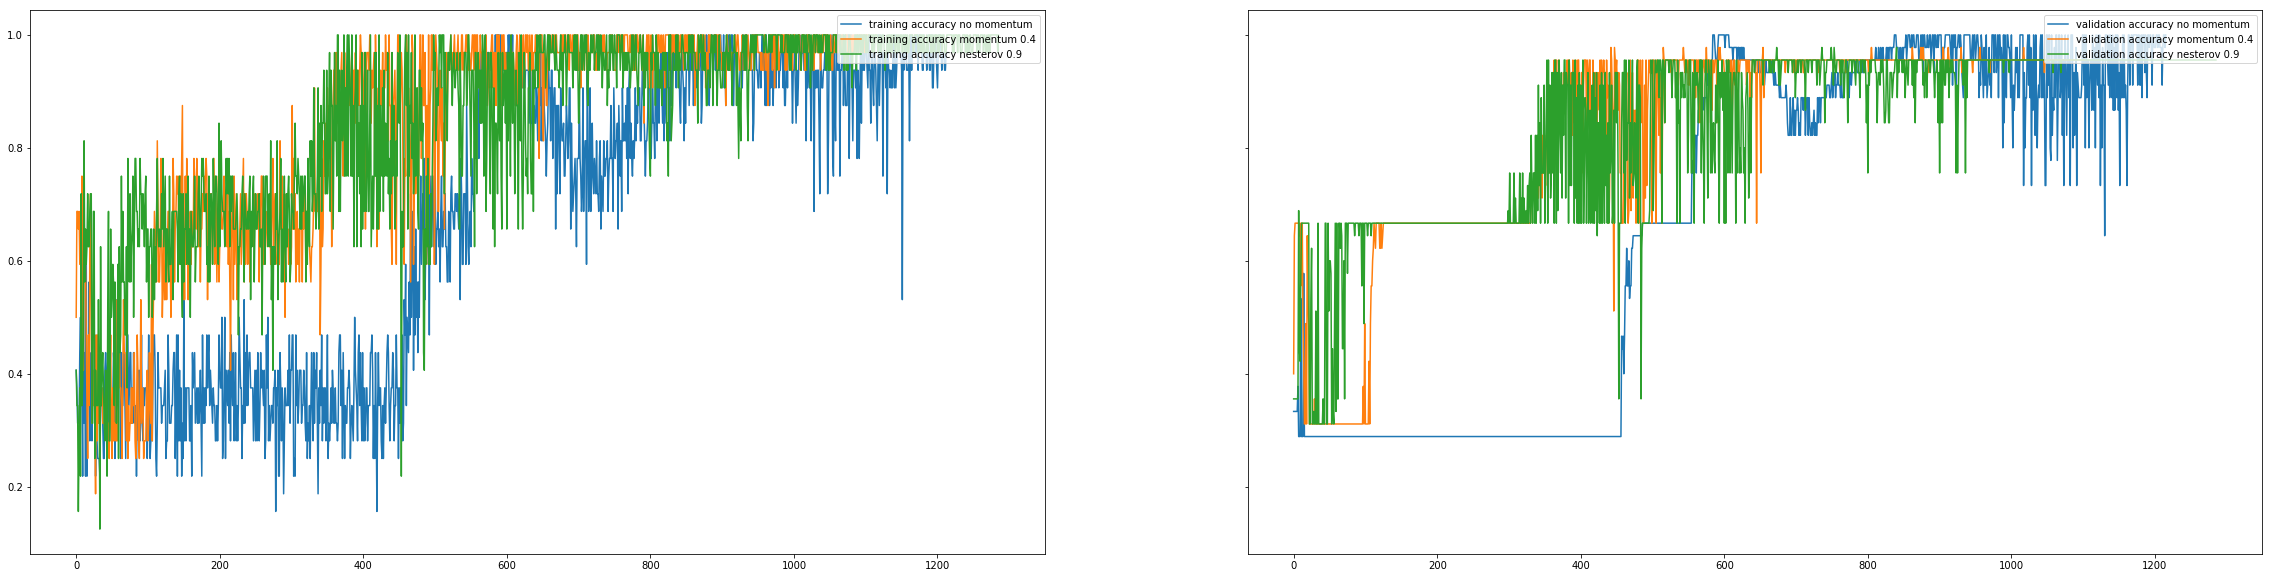

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(40, 10))
ax1.plot(no_momentum_history['acc'], label='training accuracy no momentum')
ax1.plot(momentum_history['acc'], label='training accuracy momentum 0.4')
ax1.plot(nesterov_history['acc'], label='training accuracy nesterov 0.9')

ax2.plot(no_momentum_history['valid_acc'], label='validation accuracy no momentum')
ax2.plot(momentum_history['valid_acc'], label='validation accuracy momentum 0.4')
ax2.plot(nesterov_history['valid_acc'], label='validation accuracy nesterov 0.9')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

## elliptic200

In [35]:
elliptic200_x = pickle.load(open('elliptic200_x.pl', 'rb'))
elliptic200_predict = pickle.load(open('elliptic200_predict.pl', 'rb'))
elliptic200_y = pickle.load(open('elliptic200_y.pl', 'rb')).argmax(axis=1)

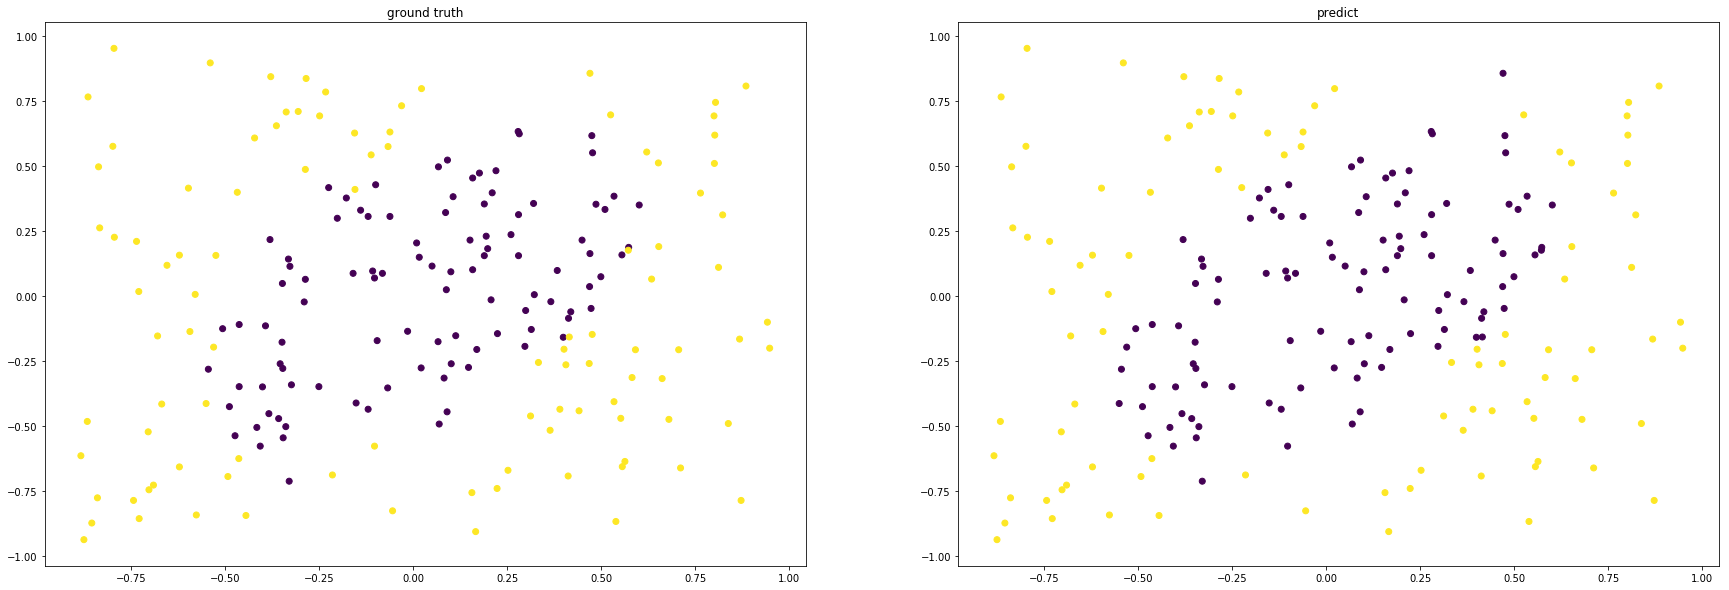

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.scatter(elliptic200_x[:,0], elliptic200_x[:, 1], c=elliptic200_y)
ax2.scatter(elliptic200_x[:,0], elliptic200_x[:, 1], c=elliptic200_predict)

ax1.set_title('ground truth')
ax2.set_title('predict')

## cross200

In [47]:
cross200_x = pickle.load(open('cross200_x.pl', 'rb'))
cross200_predict = pickle.load(open('cross200_predict.pl', 'rb'))
cross200_y = pickle.load(open('cross200_y.pl', 'rb')).argmax(axis=1)

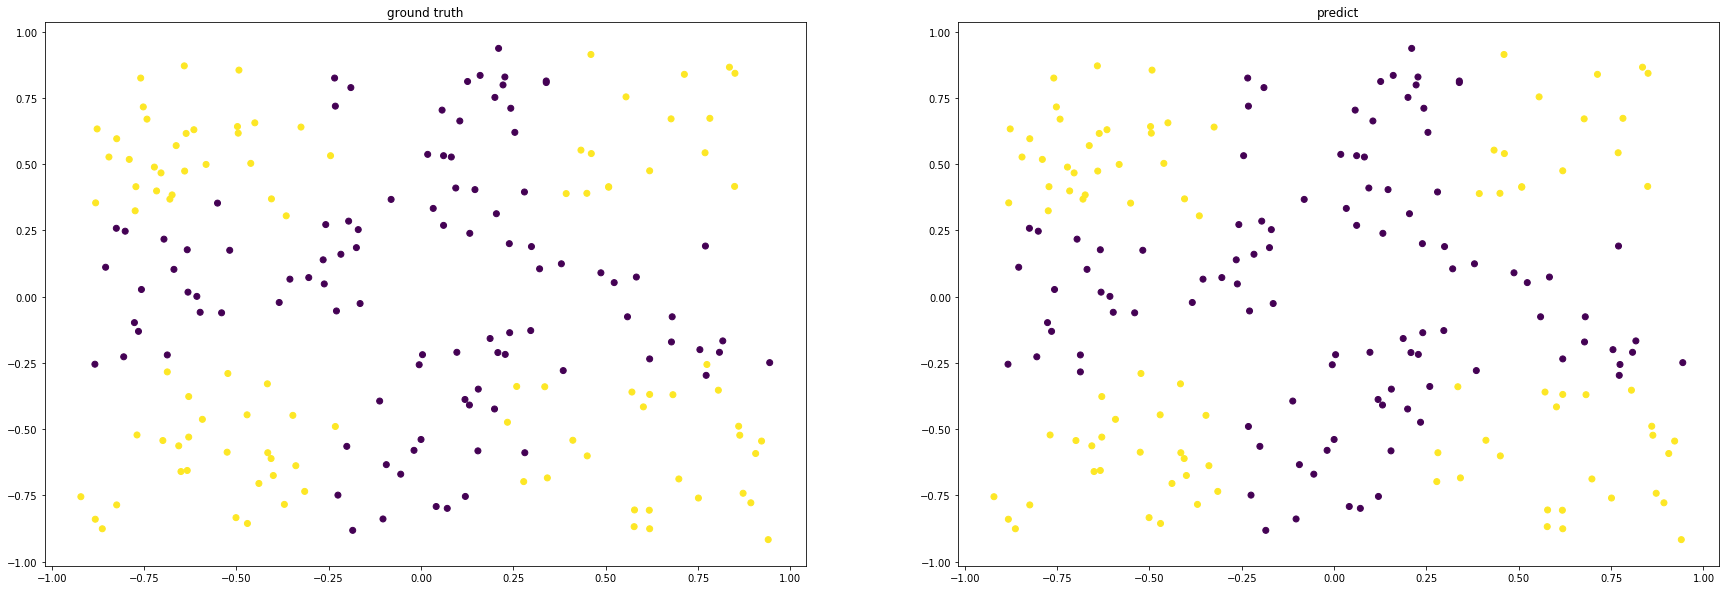

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.scatter(cross200_x[:,0], cross200_x[:, 1], c=cross200_y)
ax2.scatter(cross200_x[:,0], cross200_x[:, 1], c=cross200_predict)

ax1.set_title('ground truth')
ax2.set_title('predict')